<a href="https://www.kaggle.com/code/collinslemeke/loan-prediction-status?scriptVersionId=246948261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### PROJECT OBJECTIVE

The objective of this project is to build a predictive model that can accurately predict the loan status (Approved or Rejected) based on various features such as the number of dependents, education, self-employment status, income, loan amount, loan term, CIBIL score, residential assets value, commercial assets value, luxury assets value, and bank asset value.

By accomplishing these tasks, the project aims to develop a robust and accurate loan status prediction model that can assist in making informed lending decisions.

### Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

print("Importing All Necessary Libraries...")

Importing All Necessary Libraries...


### Data Collection, Processing & Exploration

In [2]:
print("LOAN PREDICTION DATASET BELOW")
print("=============================")

loan = pd.read_csv("/kaggle/input/loan-prediction-dataset/loan_approval_dataset.csv")
loan.head()

LOAN PREDICTION DATASET BELOW


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
print("DATA SUMMARY")
print("============")
print()
loan.info()

DATA SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
print("STATISTICAL DATA SUMMARY")
print("========================")
print()
loan.describe().head()

STATISTICAL DATA SUMMARY



,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06


In [5]:
print()
print("CHECKING FOR DUPLICATED ROWS")
print("============================")
print()

duplicate_rows = loan[loan.duplicated()] # loan.duplicated() returns a boolean Series where each element indicates 
                                         # whether the corresponding row in the 
                                         # DataFrame 'loan' is a duplicate (True) or not (False).
        
        
        
if not duplicate_rows.empty:             # duplicate_rows.empty checks if the DataFrame 'duplicate_rows' is empty or not. 
                                         # If it's empty, it means no duplicate rows were found in the original DataFrame 'loan'.
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


CHECKING FOR DUPLICATED ROWS

No duplicate rows found.


In [6]:
# Dropping the loan_id column because it is irrelevant
# Keeping unnecessary columns might add noise to the data and could lead to computational overhead during modeling. 
# Therefore, it is often best to remove irrelevant columns like 'loan_id' to keep the dataset clean and focused on meaningful features.

loan.drop('loan_id', axis = 1, inplace = True)

loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
print(loan.isnull().sum())
print()
print("The data shows no missing data in the columns")

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

The data shows no missing data in the columns


In [8]:
print("COLUMN NAMES OR DATA FEATURES/LABEL")
print("===================================")
print()
print(loan.columns)

COLUMN NAMES OR DATA FEATURES/LABEL

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [9]:
loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
loan[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [11]:
print("MinMax SCALER SUCCESSFUL!!!")
print('===========================')

scaler = MinMaxScaler()

columns_to_scale = [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']
loan[columns_to_scale] = scaler.fit_transform(loan[columns_to_scale])
loan.head()

MinMax SCALER SUCCESSFUL!!!


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,Graduate,No,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Approved
1,0.0,Not Graduate,Yes,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Rejected
2,0.6,Graduate,No,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Rejected
3,0.6,Graduate,No,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Rejected
4,1.0,Not Graduate,Yes,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Rejected


In [12]:
print("LABEL ENCODER SUCCESSFUL!!!")
print("===========================")

label_encoder = LabelEncoder()
loan[' education'] = label_encoder.fit_transform(loan[' education'])
loan[' self_employed'] = label_encoder.fit_transform(loan[' self_employed'])
loan[' loan_status'] = label_encoder.fit_transform(loan[' loan_status'])

loan.head()

LABEL ENCODER SUCCESSFUL!!!


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


<function matplotlib.pyplot.show(close=None, block=None)>

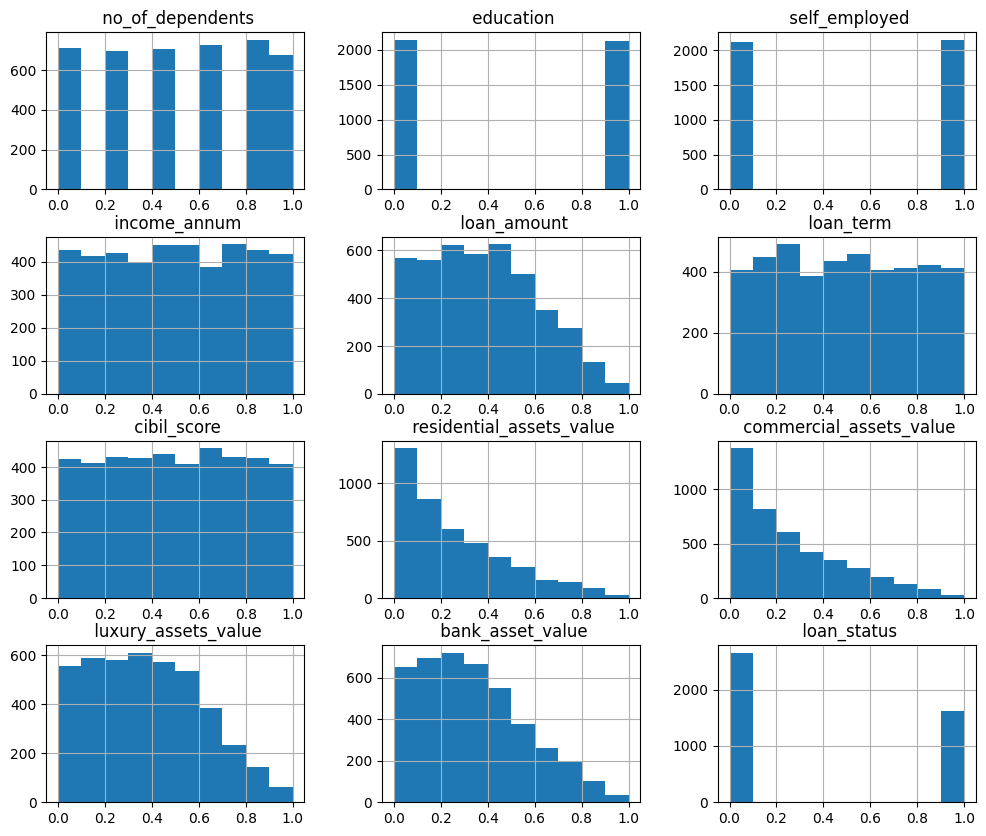

In [13]:
loan.hist(figsize = (12, 10))
plt.show

### Split Data to X features and y label for train & test

In [14]:
loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


In [15]:
print("DATA SPLITTING")
print("==============")
print()

X = loan.drop([' loan_status'], axis = 1)
y = loan[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

print("Data Split Successful...!!!")

DATA SPLITTING

Data Split Successful...!!!


In [16]:
print("BELOW IS THE SHAPE OF THE DATA AFTER SPLITTING")
print("==============================================")
print()

print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print()
print("The shape of y_train is: ", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

BELOW IS THE SHAPE OF THE DATA AFTER SPLITTING

The shape of X_train is:  (3415, 11)
The shape of X_test is:  (854, 11)

The shape of y_train is:  (3415,)
The shape of y_test is:  (854,)


### Train Data on Logistic Regression Algorithm (Classification Problem)

In [17]:
print("TRAINING DATA ON LOGISTIC REGRESSION")
print("====================================")
print()

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training Successful...!!!")

TRAINING DATA ON LOGISTIC REGRESSION

Training Successful...!!!


### Model Evaluation

In [18]:
print("MODEL EVALUATION RESULTS")
print("========================")
print()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Your Model Accuracy Score =", accuracy)
print("Your Model Precision Score =", precision)
print("Your Model Recall Score =", recall)
print("Your Model f1 Score =", f1)

MODEL EVALUATION RESULTS

Your Model Accuracy Score = 0.9110070257611241
Your Model Precision Score = 0.8832335329341318
Your Model Recall Score = 0.8885542168674698
Your Model f1 Score = 0.8858858858858859



Based on the provided model evaluation results, the model's performance can be interpreted as follows:

1. Model Accuracy Score: 0.911
The accuracy score measures the overall correctness of the model's predictions. In this case, the model achieved an accuracy of approximately 91.1%, which means it correctly predicted the target variable in the test data around 91.1% of the time.

2. Model Precision Score: 0.883
Precision measures the proportion of true positive predictions (correctly predicted positive cases) out of all positive predictions made by the model (both true positives and false positives). A precision score of 0.883 indicates that when the model predicts a positive result, it is correct around 88.3% of the time.

3. Model Recall Score: 0.888
Recall, also known as sensitivity or true positive rate, represents the proportion of true positive predictions made by the model out of all actual positive cases in the test data. In this case, the model was able to identify approximately 88.8% of the positive cases.

4. Model F1 Score: 0.886
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when the class distribution is imbalanced. The F1 score of approximately 0.886 indicates a good balance between precision and recall in this model.




In summary, the model seems to have performed well in predicting loan statuses, achieving high accuracy, precision, recall, and F1 score. However, it's essential to examine the confusion matrix and consider the specific context of the problem to ensure that the model's performance is satisfactory and meets the requirements of the application. Additionally, it is always a good practice to compare the model's performance with other models or baseline approaches to validate its effectiveness.

In [19]:

print("CONFUSION MATRIX & CLASSIFICATION REPORT")
print("========================================")
print()

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print()
print("Classification Report:")
print(report)

CONFUSION MATRIX & CLASSIFICATION REPORT

Confusion Matrix:
[[483  39]
 [ 37 295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       522
           1       0.88      0.89      0.89       332

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



1. True Positives (TP): 483 (The model correctly predicted 483 samples as "1" (positive class), which in this case likely represents "Approved" loans.)


2. False Positives (FP): 39 (The model incorrectly predicted 39 samples as "1" when they were actually "0" (negative class), representing "Rejected" loans.)


3. True Negatives (TN): 295 (The model correctly predicted 295 samples as "0," which indicates "Rejected" loans.)


4. False Negatives (FN): 37 (The model incorrectly predicted 37 samples as "0" when they were actually "1," representing "Approved" loans.)

### Visualizing Confusion Matrix

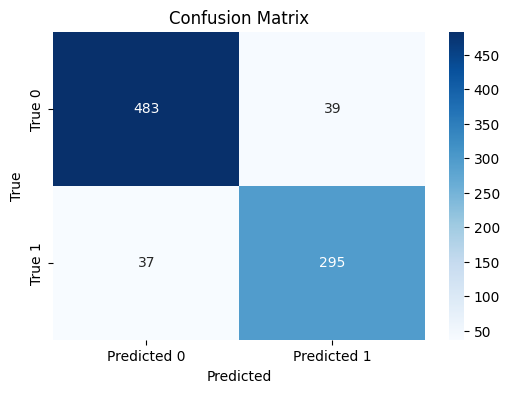

In [20]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()